In [3]:
##menginstall semua library yang dibutuhkan

In [4]:
pip install mgwr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 27.1 MB/s eta 0:00:00
  Created wheel for mgwr: filename=mgwr-2.1.2-py3-none-any.whl size=46365 sha256=24c89644828cd1c813d0b8130324d0cfb76bd1da87c1b83f394eef292c82cd0b
  Stored in directory: /root/.cache/pip/wheels/4d/43/6e/bd2d0e1ccee77089e0b266ebc4948d9a90ef363e0be23663aa
  Created wheel for spglm: filename=spglm-1.0.8-py3-none-any.whl size=38785 sha256=d2420b996b7a94f73992cb221beee8235641c863da7e522fdb66d5b5ae4d8e10
  Stored in directory: /root/.cache/pip/wheels/a2/a7/67/07d6d6809173d768c16235f813520d6a4053984a160aa933fa
Successfully built mgwr spglm


In [5]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install libpysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 117.8 MB/s eta 0:00:00


In [10]:
#Import library
import numpy as np
import libpysal as ps
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import geopandas as gp

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [11]:
#menghubungkan google drive dengan google colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [12]:
#Memasukkan file csv
clearwater_csv=pd.read_csv('/content/drive/MyDrive/2008541041_Luh Gde Trishia Damayanti_Tugas Praktikum 2_Spasial/landslides.csv')

In [13]:
#Memasukkan file quads.shp
clearwater_shp=gp.read_file('/content/drive/MyDrive/2008541041_Luh Gde Trishia Damayanti_Tugas Praktikum 2_Spasial/quads.shp')

In [14]:
clearwater_csv.head()

,UserID,X,Y,Elev,Slope,SinAspct,CosAspct,AbsSouth,Landslid,DistStrm
0,1,616168.5625,5201076.5,1450.475,27.44172,0.409126,-0.912478,24.1499,1,8.506
1,2,624923.8125,5201008.5,1567.476,21.88343,-0.919245,-0.393685,66.8160,1,15.561
2,3,615672.0000,5199187.5,1515.065,38.81030,-0.535024,-0.844837,32.3455,1,41.238
3,4,615209.3125,5199112.0,1459.827,26.71631,-0.828548,-0.559918,55.9499,1,17.539
4,5,616354.6875,5198945.5,1379.442,27.55271,-0.872281,-0.489005,60.7248,1,35.023


In [15]:
clearwater_shp.head()

,AREA,PERIMETER,QUADS_,QUADS_ID,QUADNAME,ABBR,GPS1,GPS_ID,geometry
0,5.053412e+07,29517.686965,2,0,BUZZARD ROOST,buro,40,40,"POLYGON ((604781.290 5191972.720, 599300.000 5..."
1,8.783426e+07,37494.159123,3,0,MALLARD PEAK,mapk,41,41,"POLYGON ((614131.911 5201285.000, 614306.730 5..."
2,8.610712e+07,37131.633256,4,0,POLE MTN,pomt,42,42,"POLYGON ((623646.673 5201285.000, 623832.140 5..."
3,8.423562e+07,36738.837324,5,0,BACON PEAK,bapk,43,43,"POLYGON ((633162.328 5201285.000, 633357.500 5..."
4,2.885432e+06,18143.741801,6,0,CHAMBERLAIN MTN,chmt,44,44,"POLYGON ((633590.000 5192547.020, 633357.500 5..."


<Axes: >

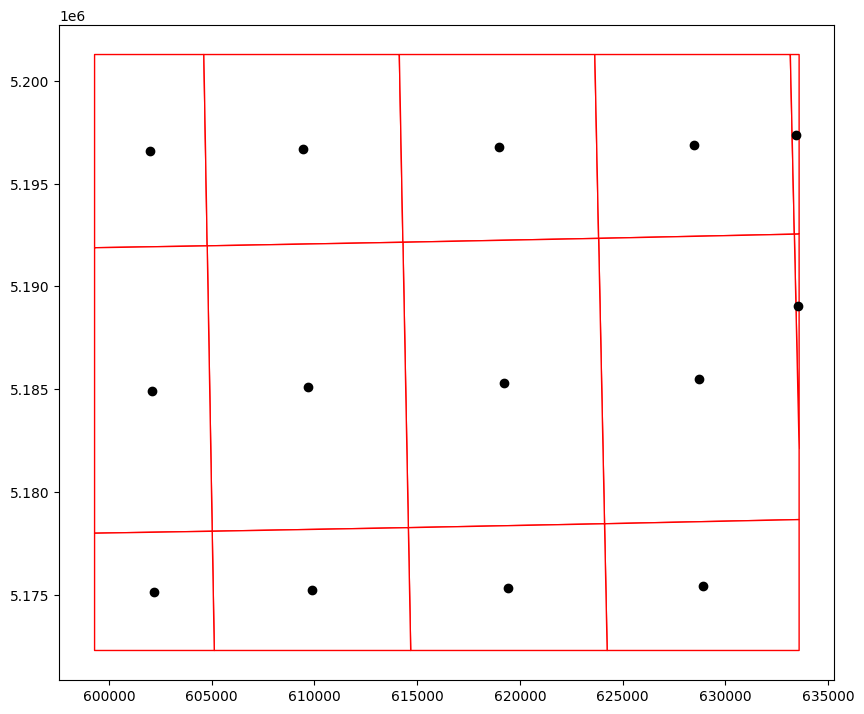

In [16]:
#Plot data spasial
fig, ax = plt.subplots(figsize=(10,10))
clearwater_shp.plot(ax=ax, **{'edgecolor':'red', 'facecolor':'white'})
clearwater_shp.centroid.plot(ax=ax, c='black')

In [17]:
#Menentukan Variabel bebas dan terikat
C_y = clearwater_csv['Landslid'].values.reshape((-1,1))
C_X = clearwater_csv[['Elev', 'Slope']].values
#Menentukan Latitude dan Longitude
u = clearwater_csv['X']
v = clearwater_csv['Y']
C_coords = list(zip(u,v))
#Standarisasi data
C_X = (C_X - C_X.mean(axis=0)) / C_X.std(axis=0)
C_y = C_y.reshape((-1,1))

C_y = (C_y - C_y.mean(axis=0)) / C_y.std(axis=0)

In [18]:
#Kalibrasi GWR model
gwr_selector = Sel_BW(C_coords, C_y, C_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(C_coords, C_y, C_X, gwr_bw).fit()

96.0


In [19]:
gwr_results.params[0:5]

array([[ 0.19811275, -0.17504834,  0.09145796],
       [ 0.23597657, -0.17344213,  0.0617439 ],
       [ 0.19173748, -0.15576904,  0.10169045],
       [ 0.18293709, -0.16430895,  0.10613757],
       [ 0.20429373, -0.13814613,  0.09577177]])

In [20]:
gwr_results.localR2[0:10]

array([[0.1070806 ],
       [0.08799355],
       [0.10164755],
       [0.10824563],
       [0.09021811],
       [0.11683968],
       [0.07083936],
       [0.07500741],
       [0.07567138],
       [0.07667804]])

In [21]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 239
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            190.641
Log-likelihood:                                                    -312.111
AIC:                                                                630.221
AICc:                                                               632.392
BIC:                                                              -1101.805
R2:                                                                   0.202
Adj. R2:                                                              0.196

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------